In [334]:
import numpy as np
import matplotlib.pylab as plt
from superlet import scale_from_period, superlet
from neurodsp import sim
from mne.time_frequency.tfr import _compute_tfr
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler

In [2]:
srate = 1000 #Hz
duration = 10 #seconds
time = np.linspace(0, duration, num=duration*srate)

noise = np.random.uniform(time.shape[0])

In [250]:
sig = sim.sim_oscillation(duration, srate, 10)

mod = sim.sim_powerlaw(duration, srate, exponent=-1)

msig = sim.utils.modulate_signal(sig, mod)

br = sim.sim_bursty_oscillation(duration, srate, 20, cycle="sine")

br2 = sim.sim_bursty_oscillation(duration, srate, 25, cycle="sine")

sig40 = sim.sim_oscillation(duration, srate, 40)/2

SIGNAL = msig+br+br2+sig40

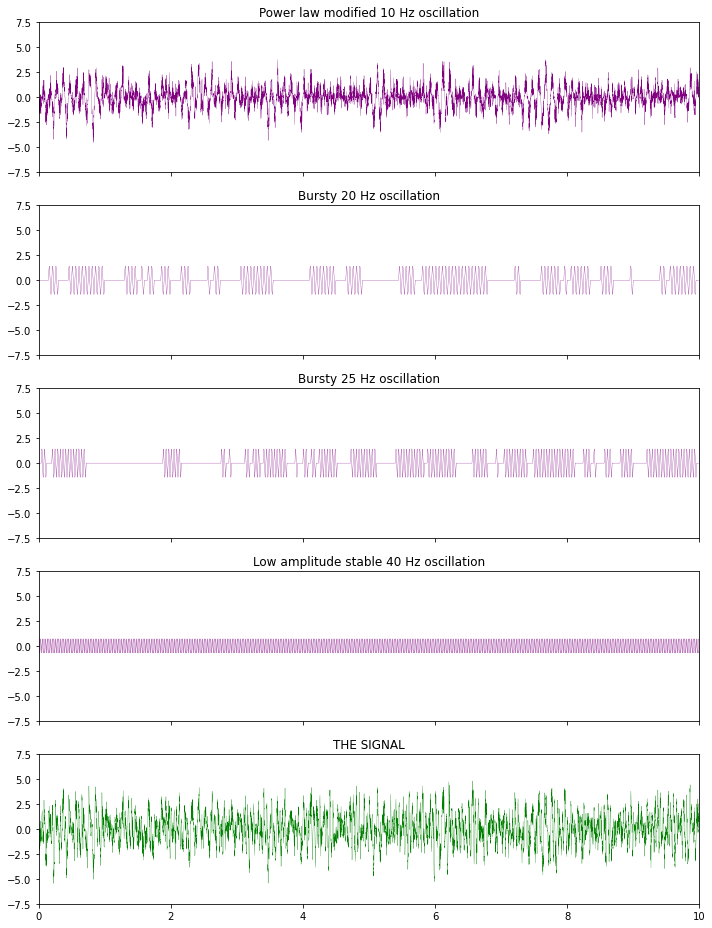

In [251]:
f, ax = plt.subplots(5, 1, figsize=(10, 13), sharex=True, sharey=True)
ax[0].plot(time, msig, lw=0.25, c="purple")
ax[0].set_title("Power law modified 10 Hz oscillation")

ax[1].plot(time, br, lw=0.25, c="purple")
ax[1].set_title("Bursty 20 Hz oscillation")

ax[2].plot(time, br2, lw=0.25, c="purple")
ax[2].set_title("Bursty 25 Hz oscillation")

ax[3].plot(time, sig40, lw=0.25, c="purple")
ax[3].set_title("Low amplitude stable 40 Hz oscillation")

ax[4].plot(time, SIGNAL, lw=0.25, c="green")
ax[4].set_title("THE SIGNAL")
ax[4].set_xlim(time[0], time[-1])
ax[4].set_ylim(-7.5, 7.5)
plt.tight_layout()

In [252]:
foi = np.linspace(1, 50, 100)
scales = scale_from_period(1/foi)

spec = superlet(
    SIGNAL,
    samplerate=srate,
    scales=scales,
    order_max=40,
    order_min=1,
    c_1=4,
    adaptive=True,
)
tf_superlet = np.single(np.abs(spec))

In [253]:
foi = np.linspace(1, 50, 100)

tf_morlet = _compute_tfr(
    SIGNAL.reshape(1, 1, -1), foi, sfreq=srate,
    method="morlet", n_cycles=5,
    use_fft=False, output='power'
)
tf_morlet = tf_morlet[0,0,:,:]

In [254]:
foi = np.linspace(1, 50, 100)

tf_multitaper = _compute_tfr(
    SIGNAL.reshape(1, 1, -1), foi, sfreq=srate,
    method="multitaper", n_cycles=5,
    use_fft=False, output='power'
)
tf_multitaper = tf_multitaper[0,0,:,:]

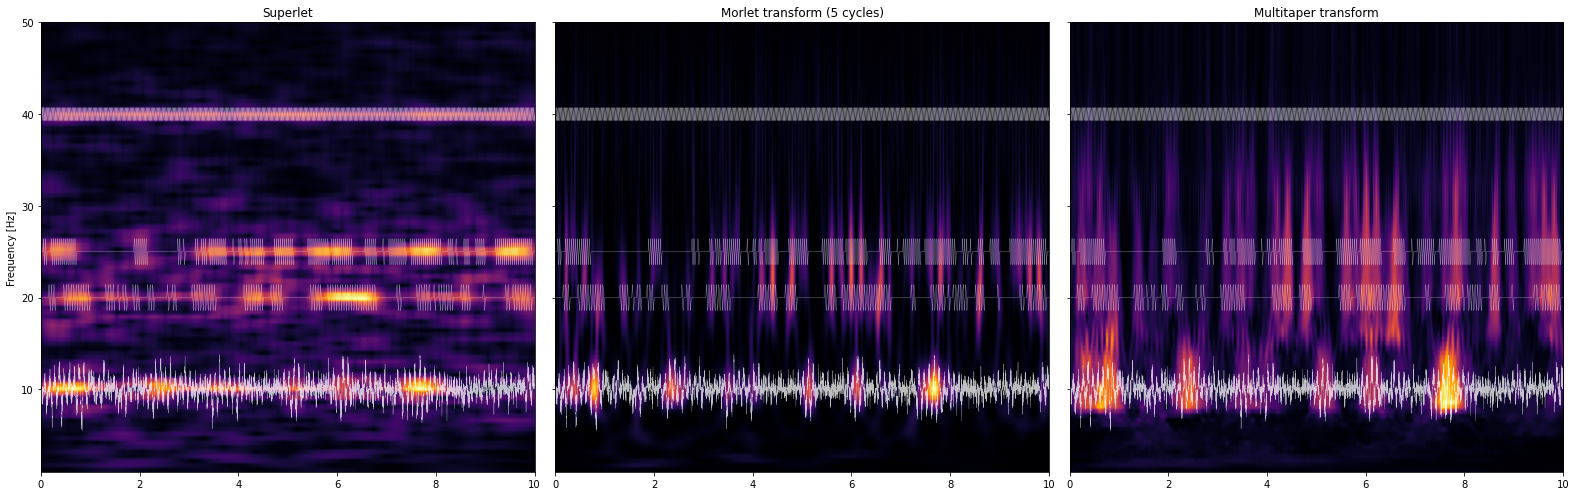

In [257]:
lw_ov = 0.3
# lw_al = 0
lw_al = 0.75

f, ax = plt.subplots(1, 3, figsize=(22, 7), sharey=True)
ax[0].set_title("Superlet")
ax[0].set_ylabel("Frequency [Hz]")

ax[0].imshow(
    tf_superlet, origin="lower", aspect="auto",
    extent=[time[0], time[-1], foi[0], foi[-1]],
    vmin=0, vmax=tf_superlet.max(), cmap="inferno"
)
ax[0].plot(time, msig+10, lw=lw_ov, color="white", alpha=lw_al)
ax[0].plot(time, br+20, lw=lw_ov, color="white", alpha=lw_al)
ax[0].plot(time, br2+25, lw=lw_ov, color="white", alpha=lw_al)
ax[0].plot(time, sig40+40, lw=lw_ov, color="white", alpha=lw_al)


ax[1].set_title("Morlet transform (5 cycles)")
ax[1].imshow(
    tf_morlet, origin="lower", aspect="auto",
    extent=[time[0], time[-1], foi[0], foi[-1]],
    vmin=0, vmax=tf_morlet.max(), cmap="inferno"
)
ax[1].plot(time, msig+10, lw=lw_ov, color="white", alpha=lw_al)
ax[1].plot(time, br+20, lw=lw_ov, color="white", alpha=lw_al)
ax[1].plot(time, br2+25, lw=lw_ov, color="white", alpha=lw_al)
ax[1].plot(time, sig40+40, lw=lw_ov, color="white", alpha=lw_al)

ax[2].set_title("Multitaper transform")
ax[2].imshow(
    tf_multitaper, origin="lower", aspect="auto",
    extent=[time[0], time[-1], foi[0], foi[-1]],
    vmin=0, vmax=tf_multitaper.max(), cmap="inferno"
)

ax[2].plot(time, msig+10, lw=lw_ov, color="white", alpha=lw_al)
ax[2].plot(time, br+20, lw=lw_ov, color="white", alpha=lw_al)
ax[2].plot(time, br2+25, lw=lw_ov, color="white", alpha=lw_al)
ax[2].plot(time, sig40+40, lw=lw_ov, color="white", alpha=lw_al)

plt.tight_layout()


In [91]:
tf_morlet[0,0,:,:]

(100, 10000)

In [258]:
short_time = np.linspace(-150, 150, num=300)

In [324]:
oscillations = []
for i in np.linspace(10,100, num=900):
    oscillations.append(i*np.sin(2*np.pi*20*short_time+0*np.pi))
oscillations = np.vstack(oscillations)

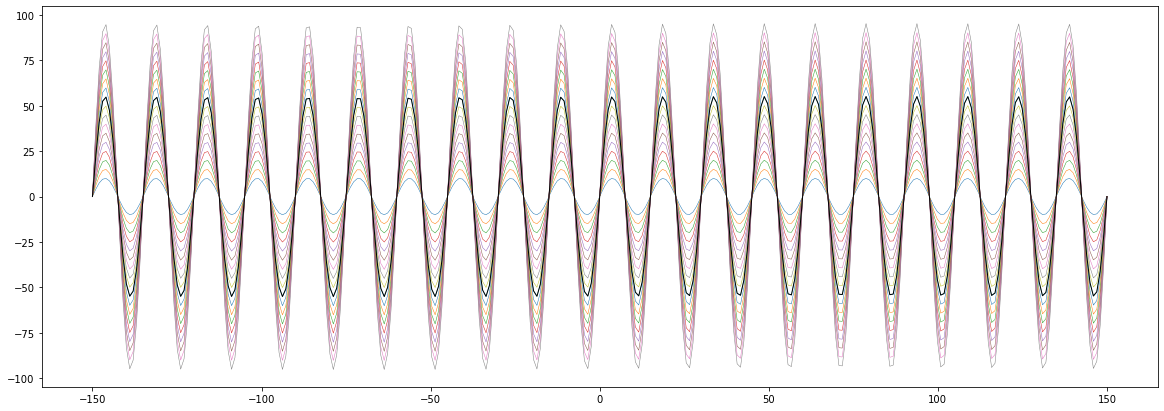

In [326]:
f, ax = plt.subplots(1, 1, figsize=(20, 7), sharey=True)
ax.plot(short_time, oscillations[::50].T, lw=0.5);
ax.plot(short_time, np.mean(oscillations, axis=0), lw=2, c="black");

In [369]:
pca = PCA(n_components=5)
transf = RobustScaler().fit_transform(oscillations)
scores = pca.fit_transform(transf)

Text(0, 0.5, 'Variance explained ratio')

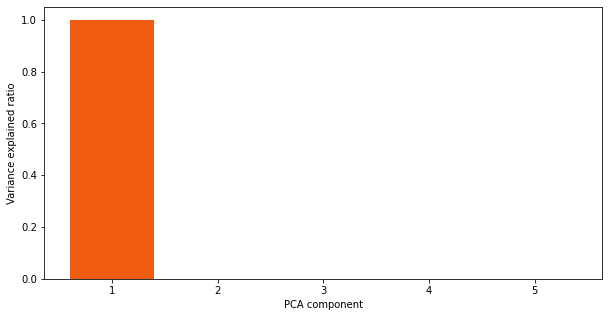

In [382]:
pc_range = np.arange(1,6)
f, ax = plt.subplots(1, 1, figsize=(10, 5), sharey=True)
sss = ax.bar(pc_range, pca.explained_variance_ratio_)
cm = plt.cm.get_cmap("turbo_r")
for i in pc_range:
    plt.setp(sss[i-1],"facecolor", cm(i/5))
ax.set_xlabel("PCA component")
ax.set_ylabel("Variance explained ratio")

In [371]:
prc = np.linspace(0,100, 11)
prc = list(zip(prc[:-1], prc[1:]))

In [372]:
prc_sc = []
prc_amp = []
for b, e in prc:
    b_prc = np.percentile(scores[:,0], b)
    e_prc = np.percentile(scores[:,0], e)
    ixes = np.where((scores[:,0] >= b_prc) & (scores[:,0] <= e_prc))[0]
    prc_sc.append(np.mean(scores[:,0][ixes]))
    prc_amp.append(np.max(np.mean(oscillations[ixes], axis=0)))
    

Text(0, 0.5, 'Actual amplitude of the signal')

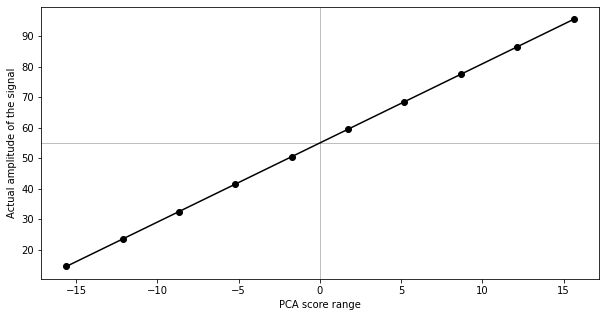

In [381]:
f, ax = plt.subplots(1, 1, figsize=(10, 5), sharey=True)
ax.scatter(prc_sc, prc_amp, c="black")
ax.plot(prc_sc, prc_amp, c="black")
ax.axhline(55, lw=0.5, alpha=.5, c="black")
ax.axvline(0, lw=0.5, alpha=.5, c="black")
ax.set_xlabel("PCA score range")
ax.set_ylabel("Actual amplitude of the signal")